# ILS Data preprocessing

In [18]:
import pandas as pd
import openpyxl

# File path
file_path = r'ILS-newest.xlsx'

# Read the specific sheet
sheet_name = 'PAV Supply Demand Detail 21-25'
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Display basic information
print(f"Shape: {df.shape}")
print(f"\nFirst few rows:")
print(df.head())
print(f"\nColumn names:")
print(df.columns.tolist())

Shape: (57246, 14)

First few rows:
  Provided Part Number Stripped Part Number  Part Date  End User Companies  \
0                 2758                 2758 2025-10-01                  26   
1                 2758                 2758 2025-09-01                  31   
2                 2758                 2758 2025-08-01                  35   
3                 2758                 2758 2025-07-01                  34   
4                 2758                 2758 2025-06-01                  36   

   End User Inquiries  Non-End User Companies  Non-End User Inquiries  \
0                  38                     132                     355   
1                  45                     109                     339   
2                  47                     143                     384   
3                  51                     132                     339   
4                  56                     207                     467   

   Total Sources  Total Quantity  Quantity NE  Quantity 

In [19]:
df

,Provided Part Number,Stripped Part Number,Part Date,End User Companies,End User Inquiries,Non-End User Companies,Non-End User Inquiries,Total Sources,Total Quantity,Quantity NE,Quantity NS,Quantity OH,Quantity SV,Quantity AR
0,2758,2758,2025-10-01,26,38,132,355,158,4329,3623,165,215,54,272
1,2758,2758,2025-09-01,31,45,109,339,152,2942,2258,165,215,45,259
2,2758,2758,2025-08-01,35,47,143,384,152,3009,2333,165,208,56,247
3,2758,2758,2025-07-01,34,51,132,339,151,3320,2614,187,226,47,246
4,2758,2758,2025-06-01,36,56,207,467,153,4141,3404,164,247,46,280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57241,Z212H0010110,Z212H0010110,2021-05-01,0,0,1,2,29,112,63,0,2,12,35
57242,Z212H0010110,Z212H0010110,2021-04-01,0,0,2,2,29,108,63,0,2,11,32
57243,Z212H0010110,Z212H0010110,2021-03-01,0,0,2,2,27,104,62,2,2,11,27
57244,Z212H0010110,Z212H0010110,2021-02-01,1,1,1,1,29,107,63,2,2,13,27


In [20]:
def clean_data(df):
    # Rename a column in the DataFrame
    df = df.rename(columns={"Provided Part Number": "PN"})
    # Drop column: 'strippedpartnumber'
    df = df.drop(columns=['Stripped Part Number'])
    # Drop column: 'partdescription'
    return df

df_clean = clean_data(df.copy())
df_clean.head()

,PN,Part Date,End User Companies,End User Inquiries,Non-End User Companies,Non-End User Inquiries,Total Sources,Total Quantity,Quantity NE,Quantity NS,Quantity OH,Quantity SV,Quantity AR
0,2758,2025-10-01,26,38,132,355,158,4329,3623,165,215,54,272
1,2758,2025-09-01,31,45,109,339,152,2942,2258,165,215,45,259
2,2758,2025-08-01,35,47,143,384,152,3009,2333,165,208,56,247
3,2758,2025-07-01,34,51,132,339,151,3320,2614,187,226,47,246
4,2758,2025-06-01,36,56,207,467,153,4141,3404,164,247,46,280


In [21]:
def aggregate_pn_data(df):
    """
    Aggregate data by PN, summing numeric columns for overlapping months.
    Returns one continuous set of months per PN.
    """
    # Sort by PN and date
    df_sorted = df.sort_values(['PN', 'Part Date']).reset_index(drop=True)
    
    # Define numeric columns to aggregate (exclude PN and partdate)
    numeric_cols = df_sorted.select_dtypes(include=['number']).columns.tolist()
    
    # Group by PN and partdate, summing all numeric columns
    df_agg = df_sorted.groupby(['PN', 'Part Date'], as_index=False)[numeric_cols].sum()
    
    # Sort by PN and date to ensure continuous months
    df_agg = df_agg.sort_values(['PN', 'Part Date']).reset_index(drop=True)
    
    return df_agg

df_agg = aggregate_pn_data(df_clean.copy())
print(f"Aggregated shape: {df_agg.shape}")
print(f"\nSample aggregated data:")
print(df_agg.head(10))
print(f"\nPartner numbers with their date ranges:")
for pn in df_agg['PN'].unique()[:5]:  # Show first 5 PNs
    pn_data = df_agg[df_agg['PN'] == pn]
    print(f"PN {pn}: {pn_data['Part Date'].min()} to {pn_data['Part Date'].max()} ({len(pn_data)} months)")

Aggregated shape: (57246, 13)

Sample aggregated data:
           PN  Part Date  End User Companies  End User Inquiries  \
0  018550-000 2021-01-01                  23                  33   
1  018550-000 2021-02-01                  20                  28   
2  018550-000 2021-03-01                  21                  27   
3  018550-000 2021-04-01                   9                  10   
4  018550-000 2021-05-01                  25                  35   
5  018550-000 2021-06-01                   6                  10   
6  018550-000 2021-07-01                  15                  19   
7  018550-000 2021-08-01                  15                  23   
8  018550-000 2021-09-01                  20                  29   
9  018550-000 2021-10-01                  27                  32   

   Non-End User Companies  Non-End User Inquiries  Total Sources  \
0                      65                     180             99   
1                      53                     183           

In [5]:
df_agg

,PN,Part Date,End User Companies,End User Inquiries,Non-End User Companies,Non-End User Inquiries,Total Sources,Total Quantity,Quantity NE,Quantity NS,Quantity OH,Quantity SV,Quantity AR
0,018550-000,2021-01-01,23,33,65,180,99,782,431,6,89,88,168
1,018550-000,2021-02-01,20,28,53,183,104,816,459,9,94,83,171
2,018550-000,2021-03-01,21,27,66,232,97,616,298,9,90,81,138
3,018550-000,2021-04-01,9,10,44,187,97,611,285,9,96,70,151
4,018550-000,2021-05-01,25,35,82,220,96,636,288,11,95,70,172
...,...,...,...,...,...,...,...,...,...,...,...,...,...
57241,Z212H0010110,2025-06-01,3,4,13,15,35,92,15,0,1,18,58
57242,Z212H0010110,2025-07-01,4,6,41,58,35,134,15,40,1,17,61
57243,Z212H0010110,2025-08-01,0,0,2,3,35,91,12,0,1,19,59
57244,Z212H0010110,2025-09-01,5,5,28,61,36,109,20,0,3,22,64


In [6]:
# Check date range in the aggregated dataset
min_date = df_agg['Part Date'].min()
max_date = df_agg['Part Date'].max()

print(f"Lowest date: {min_date}")
print(f"Greatest date: {max_date}")
print(f"Date range: {(max_date - min_date).days} days")
print(f"Number of unique dates: {df_agg['Part Date'].nunique()}")

Lowest date: 2021-01-01 00:00:00
Greatest date: 2025-10-01 00:00:00
Date range: 1734 days
Number of unique dates: 58


In [7]:
# Split the date column into month and year
df_agg['year'] = df_agg['Part Date'].dt.year
df_agg['month'] = df_agg['Part Date'].dt.month

# Display the result
print("Sample data with year and month columns:")
print(df_agg[['PN', 'Part Date', 'year', 'month']].head(10))
print(f"\nYear range: {df_agg['year'].min()} to {df_agg['year'].max()}")
print(f"Months in dataset: {sorted(df_agg['month'].unique())}")

Sample data with year and month columns:
           PN  Part Date  year  month
0  018550-000 2021-01-01  2021      1
1  018550-000 2021-02-01  2021      2
2  018550-000 2021-03-01  2021      3
3  018550-000 2021-04-01  2021      4
4  018550-000 2021-05-01  2021      5
5  018550-000 2021-06-01  2021      6
6  018550-000 2021-07-01  2021      7
7  018550-000 2021-08-01  2021      8
8  018550-000 2021-09-01  2021      9
9  018550-000 2021-10-01  2021     10

Year range: 2021 to 2025
Months in dataset: [np.int32(1), np.int32(2), np.int32(3), np.int32(4), np.int32(5), np.int32(6), np.int32(7), np.int32(8), np.int32(9), np.int32(10), np.int32(11), np.int32(12)]


In [8]:
# Reorder columns: PN, year, month, then the rest
cols = df_agg.columns.tolist()
# Remove 'year' and 'month' from their current positions
cols = [col for col in cols if col not in ['year', 'month']]
# Insert 'year' and 'month' after 'PN'
pn_index = cols.index('PN')
cols.insert(pn_index + 1, 'year')
cols.insert(pn_index + 2, 'month')

# Reorder the dataframe
df_agg = df_agg[cols]

print("Reordered columns:")
print(df_agg.columns.tolist())
print("\nDataframe with reordered columns:")
print(df_agg.head(10))

Reordered columns:
['PN', 'year', 'month', 'Part Date', 'End User Companies', 'End User Inquiries', 'Non-End User Companies', 'Non-End User Inquiries', 'Total Sources', 'Total Quantity', 'Quantity NE', 'Quantity NS', 'Quantity OH', 'Quantity SV', 'Quantity AR']

Dataframe with reordered columns:
           PN  year  month  Part Date  End User Companies  End User Inquiries  \
0  018550-000  2021      1 2021-01-01                  23                  33   
1  018550-000  2021      2 2021-02-01                  20                  28   
2  018550-000  2021      3 2021-03-01                  21                  27   
3  018550-000  2021      4 2021-04-01                   9                  10   
4  018550-000  2021      5 2021-05-01                  25                  35   
5  018550-000  2021      6 2021-06-01                   6                  10   
6  018550-000  2021      7 2021-07-01                  15                  19   
7  018550-000  2021      8 2021-08-01                  

In [9]:
df_agg

,PN,year,month,Part Date,End User Companies,End User Inquiries,Non-End User Companies,Non-End User Inquiries,Total Sources,Total Quantity,Quantity NE,Quantity NS,Quantity OH,Quantity SV,Quantity AR
0,018550-000,2021,1,2021-01-01,23,33,65,180,99,782,431,6,89,88,168
1,018550-000,2021,2,2021-02-01,20,28,53,183,104,816,459,9,94,83,171
2,018550-000,2021,3,2021-03-01,21,27,66,232,97,616,298,9,90,81,138
3,018550-000,2021,4,2021-04-01,9,10,44,187,97,611,285,9,96,70,151
4,018550-000,2021,5,2021-05-01,25,35,82,220,96,636,288,11,95,70,172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57241,Z212H0010110,2025,6,2025-06-01,3,4,13,15,35,92,15,0,1,18,58
57242,Z212H0010110,2025,7,2025-07-01,4,6,41,58,35,134,15,40,1,17,61
57243,Z212H0010110,2025,8,2025-08-01,0,0,2,3,35,91,12,0,1,19,59
57244,Z212H0010110,2025,9,2025-09-01,5,5,28,61,36,109,20,0,3,22,64


# ILS Quote data loading and pre-processing

In [10]:
# Read the CSV file
ils_quotes_path = 'ILS_Quotes.csv'
ils_quotes_df = pd.read_csv(ils_quotes_path)

# Display basic information about the dataframe
print(f"Shape: {ils_quotes_df.shape}")
print(f"\nFirst few rows:")
print(ils_quotes_df.head())
print(f"\nColumn names:")
print(ils_quotes_df.columns.tolist())


Shape: (596063, 16)

First few rows:
      DATE  Entry Date             P/N P/N Tier P/N Type Code Quote Number  \
0  2025-09  2025-09-26  D5453029620000      NaN            CE      1860874   
1  2023-11  2023-11-10      1358M35G02        3           ESG      1521789   
2  2024-06  2024-06-11      1961M77G02      NaN           ESG      1627936   
3  2024-01  2024-01-24     332W1912-79      NaN            CE      1556671   
4  2025-06  2025-06-16   340-059-832-0      NaN         OTHER      1809701   

                                        Company Name Company Type Principal  \
0                     GLOBAL CROSSING AIRLINES, INC.               OPERATOR   
1                                   CEBU PACIFIC AIR               OPERATOR   
2                      MTU MAINTENANCE HANNOVER GMBH                    MRO   
3                      MTU MAINTENANCE HANNOVER GMBH                    MRO   
4  SHANGHAI PRATT & WHITNEY AIRCRAFT ENGINE MAINT...                    MRO   

   Ext Quoted Price

C:\Users\mmarek\AppData\Local\Temp\ipykernel_6936\3131386489.py:3: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  ils_quotes_df = pd.read_csv(ils_quotes_path)


In [11]:
# Get unique part numbers from df_agg
unique_pns = df_agg['PN'].unique()
print(f"\nUnique PNs in df_agg: {len(unique_pns)}")

# Filter ils_quotes_df to only include part numbers that exist in df_agg
ils_quotes_filtered_df = ils_quotes_df[ils_quotes_df['P/N'].isin(unique_pns)].copy()

print(f"\nFiltered ILS Quotes shape: {ils_quotes_filtered_df.shape}")
print(f"Original ILS Quotes shape: {ils_quotes_df.shape}")
print(f"Matching part numbers: {len(ils_quotes_filtered_df)}")
print(f"\nFirst few rows of filtered data:")
print(ils_quotes_filtered_df.head())

# unique_pns_ils = ils_quotes_filtered_df['P/N'].unique()
# print(len(unique_pns_ils))


Unique PNs in df_agg: 987

Filtered ILS Quotes shape: (78402, 16)
Original ILS Quotes shape: (596063, 16)
Matching part numbers: 78402

First few rows of filtered data:
       DATE  Entry Date           P/N P/N Tier P/N Type Code Quote Number  \
7   2024-06  2024-06-28    UA538728-1        2           QEC      1636614   
11  2025-09  2025-09-15      441921-5        1           APQ    AOG115484   
16  2024-12  2024-12-09  9105A0005-02      NaN           ASG      1716706   
34  2024-10  2024-10-07      8061-640        1           QEC      1685054   
38  2023-11  2023-11-20   6774E010000        1           QEC      1526289   

                            Company Name Company Type Principal  \
7   ATS- AEROSPACE TECHNICAL SERVICES CO                    MRO   
11                               VUELING               OPERATOR   
16                           AVIANCA INC               OPERATOR   
34                       UAB FL TECHNICS                    MRO   
38                 ARMENIAN AIRL

In [12]:
ils_quotes_filtered_df

,DATE,Entry Date,P/N,P/N Tier,P/N Type Code,Quote Number,Company Name,Company Type Principal,Ext Quoted Price,Unit Price,Is Invoiced,Is No Quote,Qty Requested,Qty Quoted,STOCK_READY,STOCK_NOT_READY
7,2024-06,2024-06-28,UA538728-1,2,QEC,1636614,ATS- AEROSPACE TECHNICAL SERVICES CO,MRO,3000.0,3000.0,False,False,1.0,1.0,4.0,14.0
11,2025-09,2025-09-15,441921-5,1,APQ,AOG115484,VUELING,OPERATOR,145000.0,145000.0,False,False,1.0,1.0,3.0,3.0
16,2024-12,2024-12-09,9105A0005-02,NaN,ASG,1716706,AVIANCA INC,OPERATOR,0.0,0.0,False,True,3.0,0.0,NaN,NaN
34,2024-10,2024-10-07,8061-640,1,QEC,1685054,UAB FL TECHNICS,MRO,62000.0,62000.0,False,False,1.0,1.0,3.0,3.0
38,2023-11,2023-11-20,6774E010000,1,QEC,1526289,ARMENIAN AIRLINES LLC,OPERATOR,29000.0,29000.0,False,False,1.0,1.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596049,2024-04,2024-04-12,31077-211,NaN,ASG,1597066,LUFTHANSA TECHNIK AG,MRO,9000.0,9000.0,False,False,1.0,1.0,2.0,10.0
596052,2025-10,2025-10-31,20791-13AD,1.0,ASG,1875738,DELTA MATERIAL SERVICES,OPERATOR,29748.0,29748.0,False,False,1.0,1.0,3.0,3.0
596054,2025-06,2025-06-06,AEB794-171,NaN,QEC,1805377,UNITED PARCEL SERVICE CO. - SALES,OPERATOR,0.0,0.0,False,True,1.0,0.0,NaN,1.0
596059,2023-11,2023-11-14,746A0000-06,1.0,ASG,1523696,DELTA MATERIAL SERVICES,OPERATOR,7000.0,7000.0,False,False,1.0,1.0,2.0,3.0


In [13]:
# First, convert DATE column to proper datetime (first day of each month)
ils_quotes_filtered_df['date'] = pd.to_datetime(ils_quotes_filtered_df['DATE'] + '-01', format='%Y-%m-%d')

# Define aggregation columns
numeric_cols = ils_quotes_filtered_df.select_dtypes(include=['number']).columns.tolist()

# Create aggregation dictionary: sum for most columns, but max for STOCK_READY and STOCK_NOT_READY
agg_dict = {col: 'sum' for col in numeric_cols}
agg_dict['STOCK_READY'] = 'max'
agg_dict['STOCK_NOT_READY'] = 'max'

# Aggregate by P/N and date
ils_quotes_agg = ils_quotes_filtered_df.groupby(['P/N', 'date'], as_index=False).agg(agg_dict)

# Sort by P/N and date
ils_quotes_agg = ils_quotes_agg.sort_values(['P/N', 'date']).reset_index(drop=True)

print(f"Aggregated ILS Quotes shape: {ils_quotes_agg.shape}")
print(f"Original filtered shape: {ils_quotes_filtered_df.shape}")
print(f"\nSample aggregated data:")
print(ils_quotes_agg.head(10))
print(f"\nDate range in aggregated data:")
print(f"Lowest date: {ils_quotes_agg['date'].min()}")
print(f"Greatest date: {ils_quotes_agg['date'].max()}")
print(f"Number of unique dates: {ils_quotes_agg['date'].nunique()}")
print(f"\nAggregation methods:")
print(f"  - Qty Requested, Qty Quoted: SUMMED")
print(f"  - STOCK_READY, STOCK_NOT_READY: MAX (greatest amount per month)")

Aggregated ILS Quotes shape: (12986, 8)
Original filtered shape: (78402, 17)

Sample aggregated data:
          P/N       date  Ext Quoted Price  Unit Price  Qty Requested  \
0  018550-000 2023-11-01               0.0         0.0            3.0   
1  018550-000 2023-12-01           28000.0     18500.0            3.0   
2  018550-000 2024-01-01           56000.0     40000.0            7.0   
3  018550-000 2024-02-01           34400.0     25200.0            4.0   
4  018550-000 2024-03-01               0.0         0.0            2.0   
5  018550-000 2024-05-01           24250.0     24250.0            2.0   
6  018550-000 2024-06-01               0.0         0.0            1.0   
7  018550-000 2024-07-01           26140.0     13070.0            2.0   
8  018550-000 2024-08-01               0.0         0.0            2.0   
9  018550-000 2024-11-01               0.0         0.0            1.0   

   Qty Quoted  STOCK_READY  STOCK_NOT_READY  
0         2.0          NaN              NaN  
1 

In [15]:
# Filter aggregated quotes to only include dates within df_agg's date range
min_date_agg = df_agg['Part Date'].min()
max_date_agg = df_agg['Part Date'].max()

ils_quotes_agg = ils_quotes_agg[(ils_quotes_agg['date'] >= min_date_agg) & 
                                 (ils_quotes_agg['date'] <= max_date_agg)].copy()

print(f"Filtered to date range: {min_date_agg} to {max_date_agg}")
print(f"\nNew shape after date filtering: {ils_quotes_agg.shape}")
print(f"\nDate range in filtered data:")
print(f"Lowest date: {ils_quotes_agg['date'].min()}")
print(f"Greatest date: {ils_quotes_agg['date'].max()}")
print(f"Number of unique dates: {ils_quotes_agg['date'].nunique()}")
print(f"\nUnique dates in filtered data:")
print(sorted(ils_quotes_agg['date'].unique()))

Filtered to date range: 2021-01-01 00:00:00 to 2025-10-01 00:00:00

New shape after date filtering: (12986, 8)

Date range in filtered data:
Lowest date: 2023-11-01 00:00:00
Greatest date: 2025-10-01 00:00:00
Number of unique dates: 24

Unique dates in filtered data:
[Timestamp('2023-11-01 00:00:00'), Timestamp('2023-12-01 00:00:00'), Timestamp('2024-01-01 00:00:00'), Timestamp('2024-02-01 00:00:00'), Timestamp('2024-03-01 00:00:00'), Timestamp('2024-04-01 00:00:00'), Timestamp('2024-05-01 00:00:00'), Timestamp('2024-06-01 00:00:00'), Timestamp('2024-07-01 00:00:00'), Timestamp('2024-08-01 00:00:00'), Timestamp('2024-09-01 00:00:00'), Timestamp('2024-10-01 00:00:00'), Timestamp('2024-11-01 00:00:00'), Timestamp('2024-12-01 00:00:00'), Timestamp('2025-01-01 00:00:00'), Timestamp('2025-02-01 00:00:00'), Timestamp('2025-03-01 00:00:00'), Timestamp('2025-04-01 00:00:00'), Timestamp('2025-05-01 00:00:00'), Timestamp('2025-06-01 00:00:00'), Timestamp('2025-07-01 00:00:00'), Timestamp('2025-0

In [16]:
ils_quotes_agg

,P/N,date,Ext Quoted Price,Unit Price,Qty Requested,Qty Quoted,STOCK_READY,STOCK_NOT_READY
0,018550-000,2023-11-01,0.0,0.0,3.0,2.0,NaN,NaN
1,018550-000,2023-12-01,28000.0,18500.0,3.0,3.0,2.0,2.0
2,018550-000,2024-01-01,56000.0,40000.0,7.0,7.0,2.0,2.0
3,018550-000,2024-02-01,34400.0,25200.0,4.0,4.0,2.0,2.0
4,018550-000,2024-03-01,0.0,0.0,2.0,2.0,NaN,NaN
...,...,...,...,...,...,...,...,...
12981,Z212H0010110,2024-10-01,1800.0,1800.0,1.0,1.0,1.0,2.0
12982,Z212H0010110,2024-11-01,750.0,750.0,1.0,1.0,1.0,2.0
12983,Z212H0010110,2025-05-01,1400.0,1400.0,1.0,1.0,1.0,1.0
12984,Z212H0010110,2025-06-01,0.0,0.0,1.0,1.0,NaN,NaN


# Demand Classification Analysis
Calculate ADI (Average Demand Interval) and CV² for each unique PN to classify demand patterns

In [22]:
import numpy as np
from datetime import timedelta

def calculate_adi_cv2_classification(df, demand_col):
    """
    Calculate ADI (Average Demand Interval) and CV² for each PN.
    
    ADI = Average Demand Interval (average time between periods with demand)
    CV² = Coefficient of Variation squared (measure of demand variability)
    
    Classification:
    - Smooth: ADI < 1.32 and CV² < 0.49
    - Intermittent: ADI >= 1.32 and CV² < 0.49
    - Erratic: ADI < 1.32 and CV² >= 0.49
    - Lumpy: ADI >= 1.32 and CV² >= 0.49
    """
    
    results = []
    
    for pn in df['PN'].unique():
        pn_data = df[df['PN'] == pn].sort_values('Part Date').copy()
        
        # Get demand values
        demands = pn_data[demand_col].values
        dates = pn_data['Part Date'].values
        
        # Calculate CV² (coefficient of variation squared)
        mean_demand = demands.mean()
        std_demand = demands.std()
        
        if mean_demand > 0:
            cv = std_demand / mean_demand
            cv2 = cv ** 2
        else:
            cv2 = 0
        
        # Calculate ADI (Average Demand Interval)
        # Count periods with demand > 0
        periods_with_demand = (demands > 0).sum()
        
        if periods_with_demand > 1:
            # Calculate intervals between demand periods
            demand_dates = dates[demands > 0]
            intervals = np.diff(demand_dates).astype('timedelta64[D]').astype(int)
            adi = intervals.mean() / 30  # Convert days to months (approximate)
        else:
            adi = len(pn_data)  # If only 1 or 0 periods with demand
        
        # Classify demand pattern
        if adi < 1.32 and cv2 < 0.49:
            classification = 'Smooth'
        elif adi >= 1.32 and cv2 < 0.49:
            classification = 'Intermittent'
        elif adi < 1.32 and cv2 >= 0.49:
            classification = 'Erratic'
        else:  # adi >= 1.32 and cv2 >= 0.49
            classification = 'Lumpy'
        
        results.append({
            'PN': pn,
            'ADI': round(adi, 4),
            'CV²': round(cv2, 4),
            'Classification': classification,
            'Mean_Demand': round(mean_demand, 2),
            'Std_Demand': round(std_demand, 2),
            'Periods_with_Demand': periods_with_demand,
            'Total_Periods': len(pn_data)
        })
    
    return pd.DataFrame(results)

# Calculate metrics for df_agg using 'End User Inquiries'
df_agg_with_pn = df_clean.copy()
df_agg_with_pn['year'] = df_agg_with_pn['Part Date'].dt.year
df_agg_with_pn['month'] = df_agg_with_pn['Part Date'].dt.month

# Calculate metrics
metrics_df = calculate_adi_cv2_classification(df_agg_with_pn, 'End User Inquiries')

# Sort by classification and then by ADI
metrics_df_sorted = metrics_df.sort_values(['Classification', 'ADI'])

print(f"Total unique PNs analyzed: {len(metrics_df)}")
print(f"\nDemand Classification Summary:")
print(metrics_df_sorted['Classification'].value_counts().sort_index())
print(f"\nFirst 10 parts with their metrics:")
print(metrics_df_sorted.head(10))


Total unique PNs analyzed: 987

Demand Classification Summary:
Classification
Erratic         233
Intermittent     42
Lumpy           410
Smooth          302
Name: count, dtype: int64

First 10 parts with their metrics:
                 PN     ADI      CV² Classification  Mean_Demand  Std_Demand  \
233    221-5364-501  0.9333  35.2500        Erratic         0.07        0.41   
616          56H442  1.0000  35.2500        Erratic         0.07        0.41   
240       2215628-3  1.0137   0.7078        Erratic        20.03       16.86   
2             30210  1.0140   1.6003        Erratic        10.03       12.69   
24          4205401  1.0140   0.6533        Erratic        27.88       22.53   
32       1982660116  1.0140   1.0857        Erratic        15.19       15.83   
42   066-01212-0102  1.0140   0.5910        Erratic        19.29       14.83   
45   066-50008-0409  1.0140   0.5480        Erratic        24.83       18.38   
54       10037-0750  1.0140   0.5106        Erratic        1

In [23]:

# Display full results
print("=" * 100)
print("COMPLETE DEMAND METRICS TABLE FOR ALL UNIQUE PART NUMBERS")
print("=" * 100)
print(metrics_df_sorted.to_string())


COMPLETE DEMAND METRICS TABLE FOR ALL UNIQUE PART NUMBERS
                   PN      ADI      CV² Classification  Mean_Demand  Std_Demand  Periods_with_Demand  Total_Periods
233      221-5364-501   0.9333  35.2500        Erratic         0.07        0.41                    2             58
616            56H442   1.0000  35.2500        Erratic         0.07        0.41                    2             58
240         2215628-3   1.0137   0.7078        Erratic        20.03       16.86                   57             58
2               30210   1.0140   1.6003        Erratic        10.03       12.69                   58             58
24            4205401   1.0140   0.6533        Erratic        27.88       22.53                   58             58
32         1982660116   1.0140   1.0857        Erratic        15.19       15.83                   58             58
42     066-01212-0102   1.0140   0.5910        Erratic        19.29       14.83                   58             58
45     066-500

In [24]:

# Export results to CSV
output_file = 'Part_Demand_Metrics.csv'
metrics_df_sorted.to_csv(output_file, index=False)
print(f"\nResults exported to: {output_file}")

# Summary statistics by classification
print("\n" + "=" * 100)
print("SUMMARY STATISTICS BY CLASSIFICATION")
print("=" * 100)
summary_stats = metrics_df.groupby('Classification').agg({
    'ADI': ['min', 'max', 'mean'],
    'CV²': ['min', 'max', 'mean'],
    'Mean_Demand': ['min', 'max', 'mean'],
    'PN': 'count'
}).round(4)
summary_stats.columns = ['_'.join(col).strip() for col in summary_stats.columns.values]
summary_stats = summary_stats.rename(columns={'PN_count': 'Count'})
print(summary_stats)



Results exported to: Part_Demand_Metrics.csv

SUMMARY STATISTICS BY CLASSIFICATION
                ADI_min  ADI_max  ADI_mean  CV²_min  CV²_max  CV²_mean  \
Classification                                                           
Erratic          0.9333   1.3136    1.0967   0.4903  35.2500    1.6268   
Intermittent    58.0000  58.0000   58.0000   0.0000   0.0000    0.0000   
Lumpy            1.3202  58.0000   10.4388   0.8516  57.0000   12.8629   
Smooth           1.0140   1.1115    1.0212   0.0880   0.4882    0.2888   

                Mean_Demand_min  Mean_Demand_max  Mean_Demand_mean  Count  
Classification                                                             
Erratic                    0.03            45.91            9.8920    233  
Intermittent               0.00             0.00            0.0000     42  
Lumpy                      0.02             6.02            0.7952    410  
Smooth                     3.38           120.22           23.3445    302  


C:\Users\mmarek\AppData\Local\Temp\ipykernel_6936\3618941001.py:52: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax4.boxplot(data_for_box, labels=['Smooth', 'Intermittent', 'Erratic', 'Lumpy'],


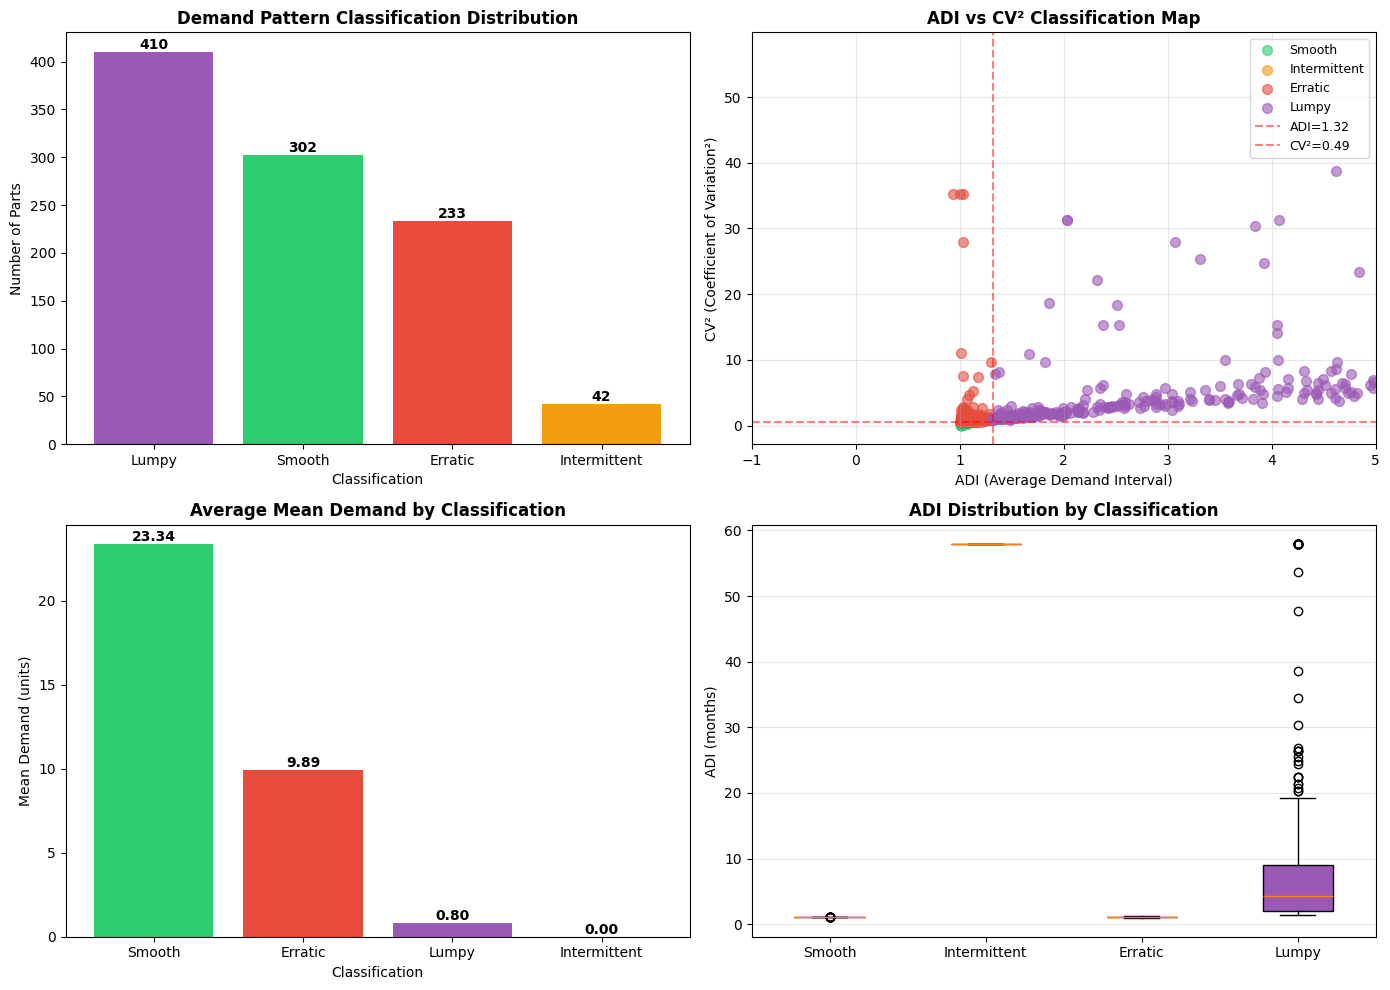

Visualization saved as: Demand_Metrics_Analysis.png


In [25]:

import matplotlib.pyplot as plt

# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Classification distribution
ax1 = axes[0, 0]
classification_counts = metrics_df['Classification'].value_counts()
colors = {'Smooth': '#2ecc71', 'Intermittent': '#f39c12', 'Erratic': '#e74c3c', 'Lumpy': '#9b59b6'}
bars = ax1.bar(classification_counts.index, classification_counts.values, 
               color=[colors.get(x, '#95a5a6') for x in classification_counts.index])
ax1.set_title('Demand Pattern Classification Distribution', fontsize=12, fontweight='bold')
ax1.set_ylabel('Number of Parts')
ax1.set_xlabel('Classification')
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}', ha='center', va='bottom', fontweight='bold')

# 2. ADI vs CV² scatter plot
ax2 = axes[0, 1]
for classification in ['Smooth', 'Intermittent', 'Erratic', 'Lumpy']:
    data = metrics_df[metrics_df['Classification'] == classification]
    ax2.scatter(data['ADI'], data['CV²'], label=classification, 
               color=colors.get(classification, '#95a5a6'), alpha=0.6, s=50)
ax2.axvline(x=1.32, color='red', linestyle='--', alpha=0.5, label='ADI=1.32')
ax2.axhline(y=0.49, color='red', linestyle='--', alpha=0.5, label='CV²=0.49')
ax2.set_xlabel('ADI (Average Demand Interval)')
ax2.set_ylabel('CV² (Coefficient of Variation²)')
ax2.set_title('ADI vs CV² Classification Map', fontsize=12, fontweight='bold')
ax2.legend(loc='best', fontsize=9)
ax2.grid(True, alpha=0.3)
ax2.set_xlim(-1, 5)  # Limit x-axis for better visibility

# 3. Mean Demand by Classification
ax3 = axes[1, 0]
mean_demand_by_class = metrics_df.groupby('Classification')['Mean_Demand'].mean().sort_values(ascending=False)
bars = ax3.bar(mean_demand_by_class.index, mean_demand_by_class.values,
              color=[colors.get(x, '#95a5a6') for x in mean_demand_by_class.index])
ax3.set_title('Average Mean Demand by Classification', fontsize=12, fontweight='bold')
ax3.set_ylabel('Mean Demand (units)')
ax3.set_xlabel('Classification')
for bar in bars:
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.2f}', ha='center', va='bottom', fontweight='bold')

# 4. ADI distribution by Classification (box plot)
ax4 = axes[1, 1]
data_for_box = [metrics_df[metrics_df['Classification'] == c]['ADI'].values 
                for c in ['Smooth', 'Intermittent', 'Erratic', 'Lumpy']]
bp = ax4.boxplot(data_for_box, labels=['Smooth', 'Intermittent', 'Erratic', 'Lumpy'],
                 patch_artist=True)
for patch, classification in zip(bp['boxes'], ['Smooth', 'Intermittent', 'Erratic', 'Lumpy']):
    patch.set_facecolor(colors.get(classification, '#95a5a6'))
ax4.set_title('ADI Distribution by Classification', fontsize=12, fontweight='bold')
ax4.set_ylabel('ADI (months)')
ax4.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('Demand_Metrics_Analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("Visualization saved as: Demand_Metrics_Analysis.png")


## Demand Classification Insights

### Classification Definitions:
- **Smooth (ADI < 1.32, CV² < 0.49)**: Regular, predictable demand with low variability. Easier to forecast.
- **Intermittent (ADI ≥ 1.32, CV² < 0.49)**: Sparse demand with long gaps between orders, but consistent quantities when they occur.
- **Erratic (ADI < 1.32, CV² ≥ 0.49)**: Frequent demand but highly variable quantities. Difficult to forecast.
- **Lumpy (ADI ≥ 1.32, CV² ≥ 0.49)**: Sparse and highly variable demand. Most difficult to forecast.

### Key Findings:
- **Total unique part numbers analyzed**: 987
- **Most common pattern**: Lumpy (410 parts, 41.5%)
- **Most predictable**: Smooth (302 parts, 30.6%)
- **Smooth demand** has the highest average mean demand (23.34 units)
- **Intermittent demand** parts have very low or zero mean demand, indicating rarely ordered items

# Top 10 Parts Trend Analysis by Classification

In [26]:

# Get top 10 parts from each classification by mean demand
top_10_by_class = {}
for classification in ['Smooth', 'Intermittent', 'Erratic', 'Lumpy']:
    top_pns = metrics_df[metrics_df['Classification'] == classification].nlargest(10, 'Mean_Demand')['PN'].values
    top_10_by_class[classification] = top_pns

print("Top 10 parts by Mean Demand for each classification:")
for classification, pns in top_10_by_class.items():
    print(f"\n{classification}:")
    class_metrics = metrics_df[metrics_df['Classification'] == classification].nlargest(10, 'Mean_Demand')[['PN', 'Mean_Demand', 'ADI', 'CV²']]
    print(class_metrics.to_string(index=False))


Top 10 parts by Mean Demand for each classification:

Smooth:
          PN  Mean_Demand   ADI    CV²
    DMC50-17       120.22 1.014 0.2710
980-4700-042        78.47 1.014 0.2262
980-6022-001        75.50 1.014 0.1454
622-8973-001        74.90 1.014 0.1241
   802300-14        74.24 1.014 0.1373
   2206400-2        64.53 1.014 0.3386
   3214446-4        63.91 1.014 0.1769
   801307-00        61.21 1.014 0.2067
        2758        56.83 1.014 0.0880
      442653        55.76 1.014 0.3815

Intermittent:
          PN  Mean_Demand  ADI  CV²
  1346M31G05          0.0 58.0  0.0
  1446M79G01          0.0 58.0  0.0
  1519M67P02          0.0 58.0  0.0
  1582M14G03          0.0 58.0  0.0
  1824M73G01          0.0 58.0  0.0
  1958M34G01          0.0 58.0  0.0
221-4950-803          0.0 58.0  0.0
221-5401-519          0.0 58.0  0.0
221-5901-523          0.0 58.0  0.0
221W5102-517          0.0 58.0  0.0

Erratic:
            PN  Mean_Demand    ADI    CV²
  822-0334-002        45.91 1.0140 0.7699
D215

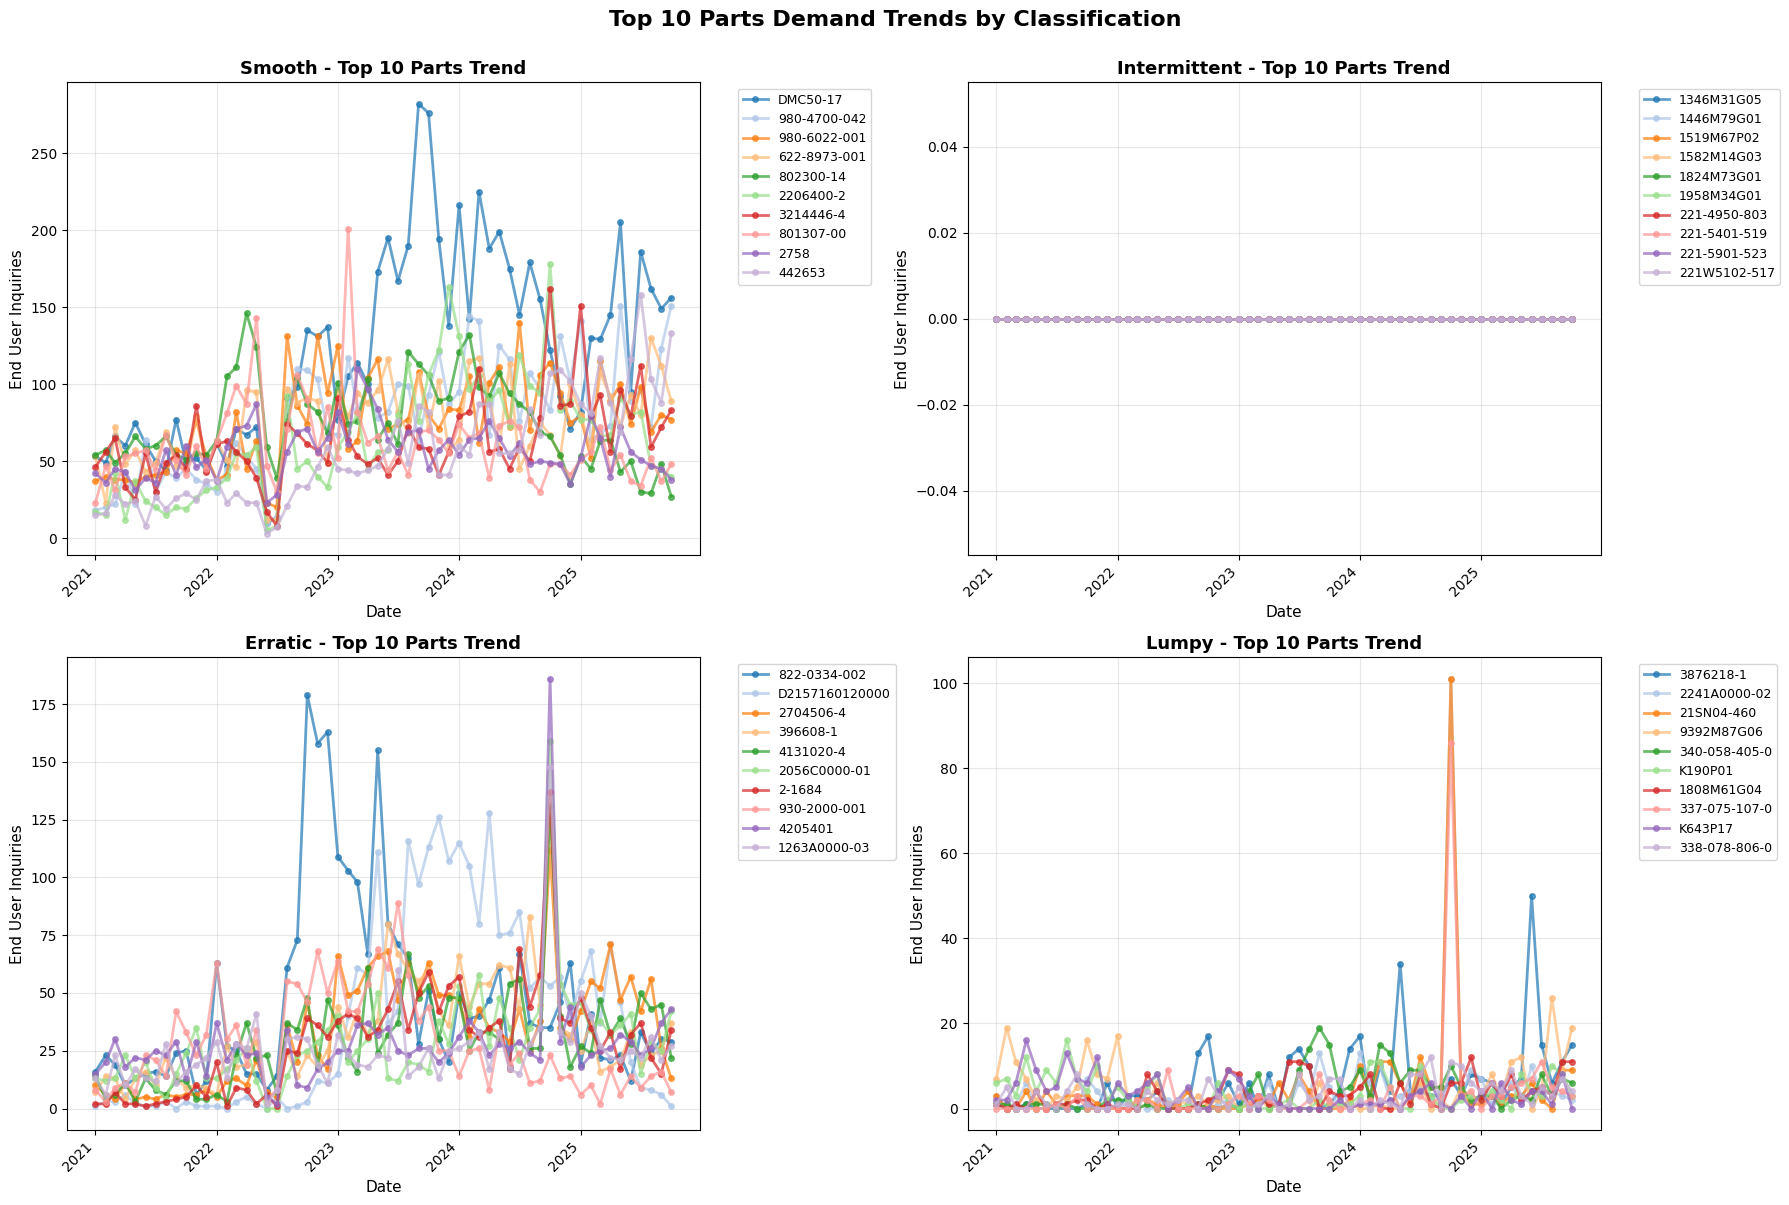


Trend chart saved as: Top10_Trends_by_Classification.png


In [27]:

# Create trend line charts for top 10 parts in each classification
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Top 10 Parts Demand Trends by Classification', fontsize=16, fontweight='bold', y=1.00)

colors_dict = {'Smooth': '#2ecc71', 'Intermittent': '#f39c12', 'Erratic': '#e74c3c', 'Lumpy': '#9b59b6'}
classification_order = ['Smooth', 'Intermittent', 'Erratic', 'Lumpy']

for idx, classification in enumerate(classification_order):
    ax = axes[idx // 2, idx % 2]
    
    # Get top 10 parts for this classification
    top_pns = top_10_by_class[classification]
    
    # Get color palette for top 10 parts
    colors_palette = plt.cm.tab20(range(len(top_pns)))
    
    # Plot trend for each top 10 part
    for color_idx, pn in enumerate(top_pns):
        # Filter data for this part number from df_clean
        pn_data = df_clean[df_clean['PN'] == pn].sort_values('Part Date')
        
        if len(pn_data) > 0:
            ax.plot(pn_data['Part Date'], pn_data['End User Inquiries'], 
                   marker='o', label=pn, alpha=0.7, linewidth=2, 
                   color=colors_palette[color_idx], markersize=4)
    
    ax.set_title(f'{classification} - Top 10 Parts Trend', fontsize=13, fontweight='bold')
    ax.set_xlabel('Date', fontsize=11)
    ax.set_ylabel('End User Inquiries', fontsize=11)
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
    ax.grid(True, alpha=0.3)
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.savefig('Top10_Trends_by_Classification.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nTrend chart saved as: Top10_Trends_by_Classification.png")


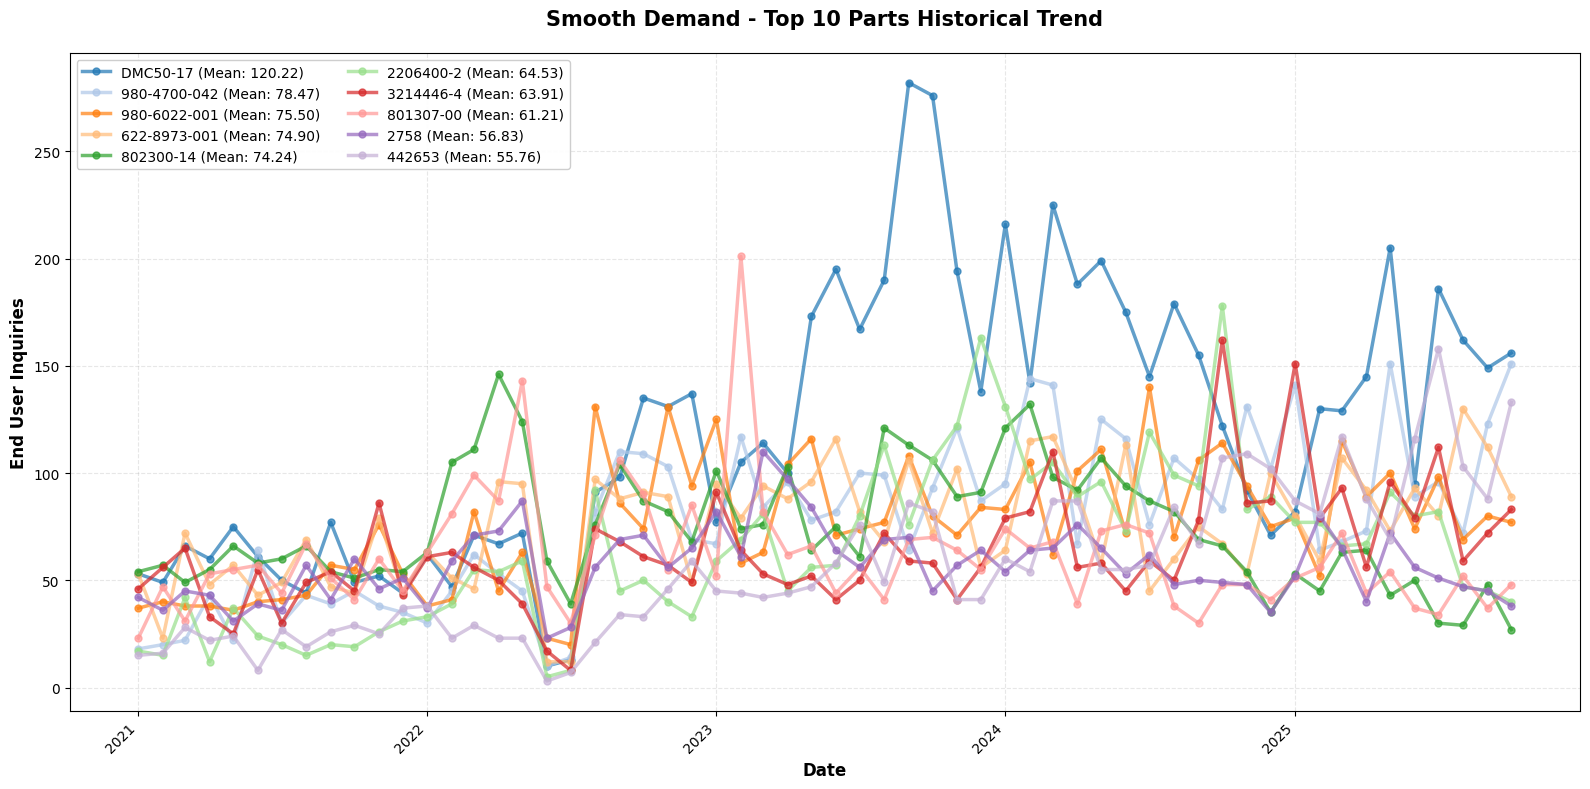

Chart saved as: Trend_Smooth_Top10.png


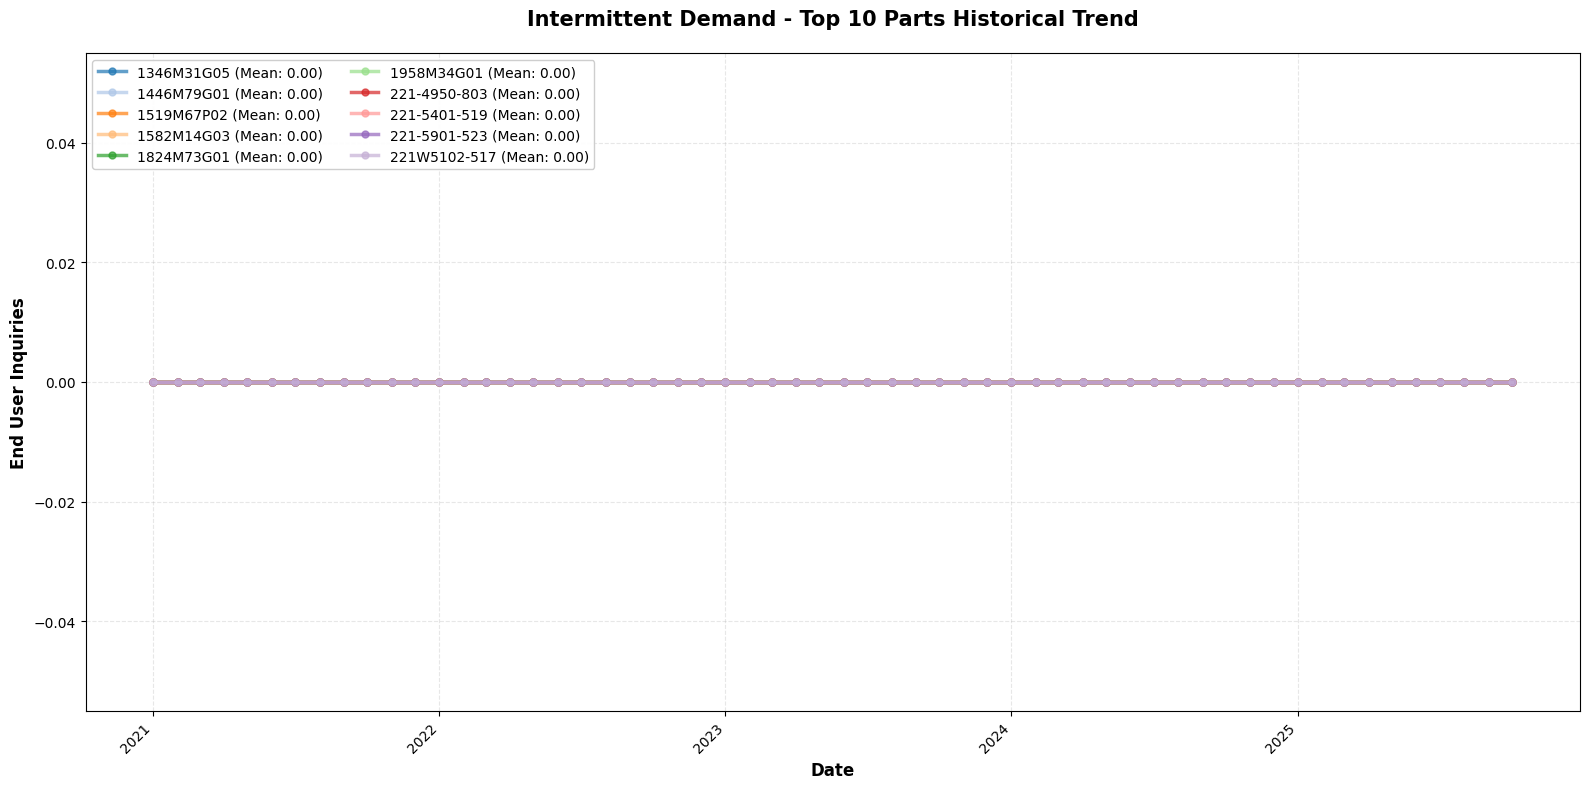

Chart saved as: Trend_Intermittent_Top10.png


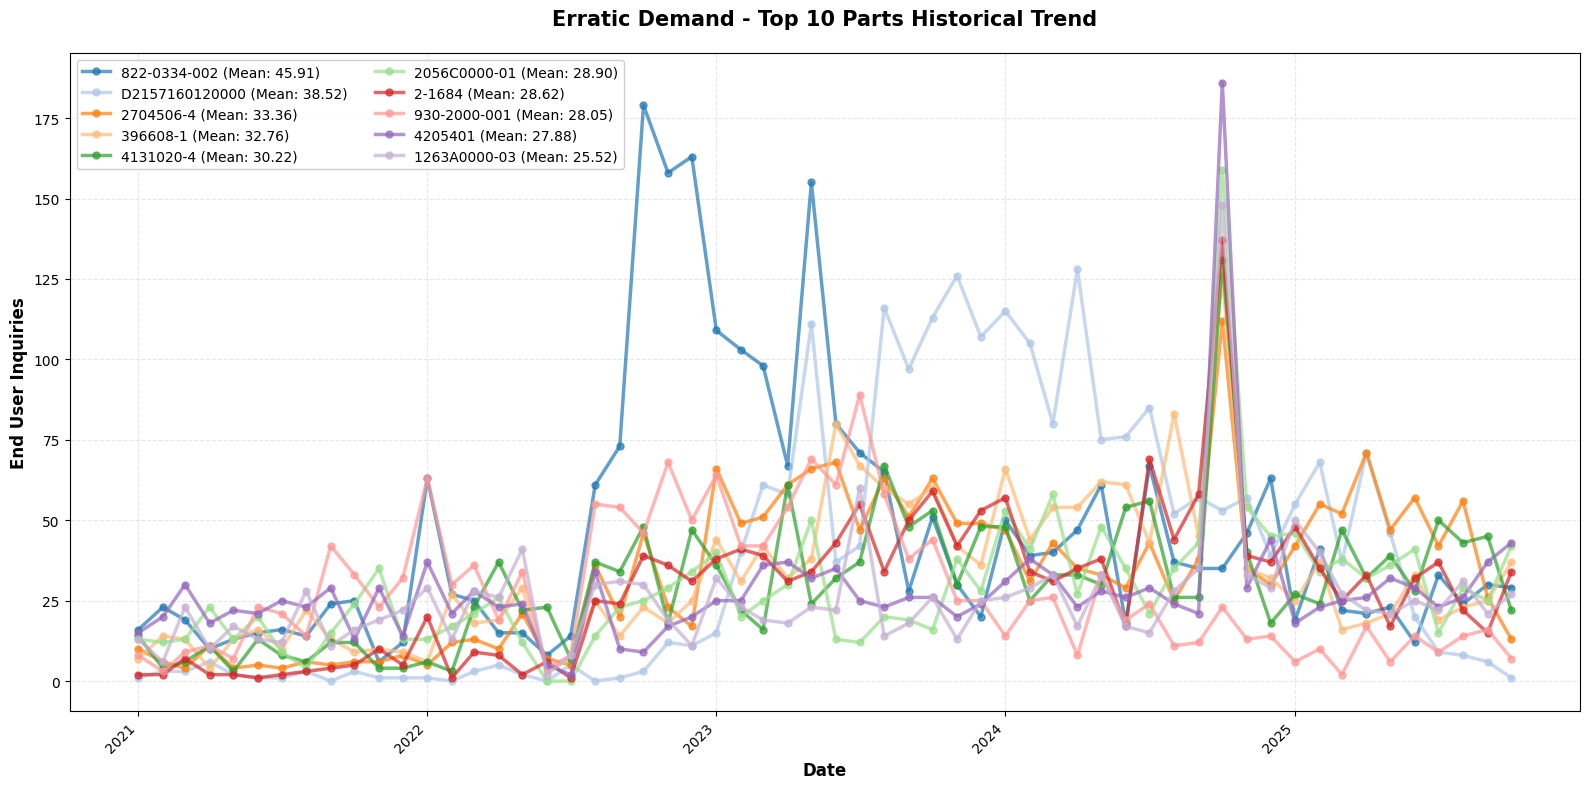

Chart saved as: Trend_Erratic_Top10.png


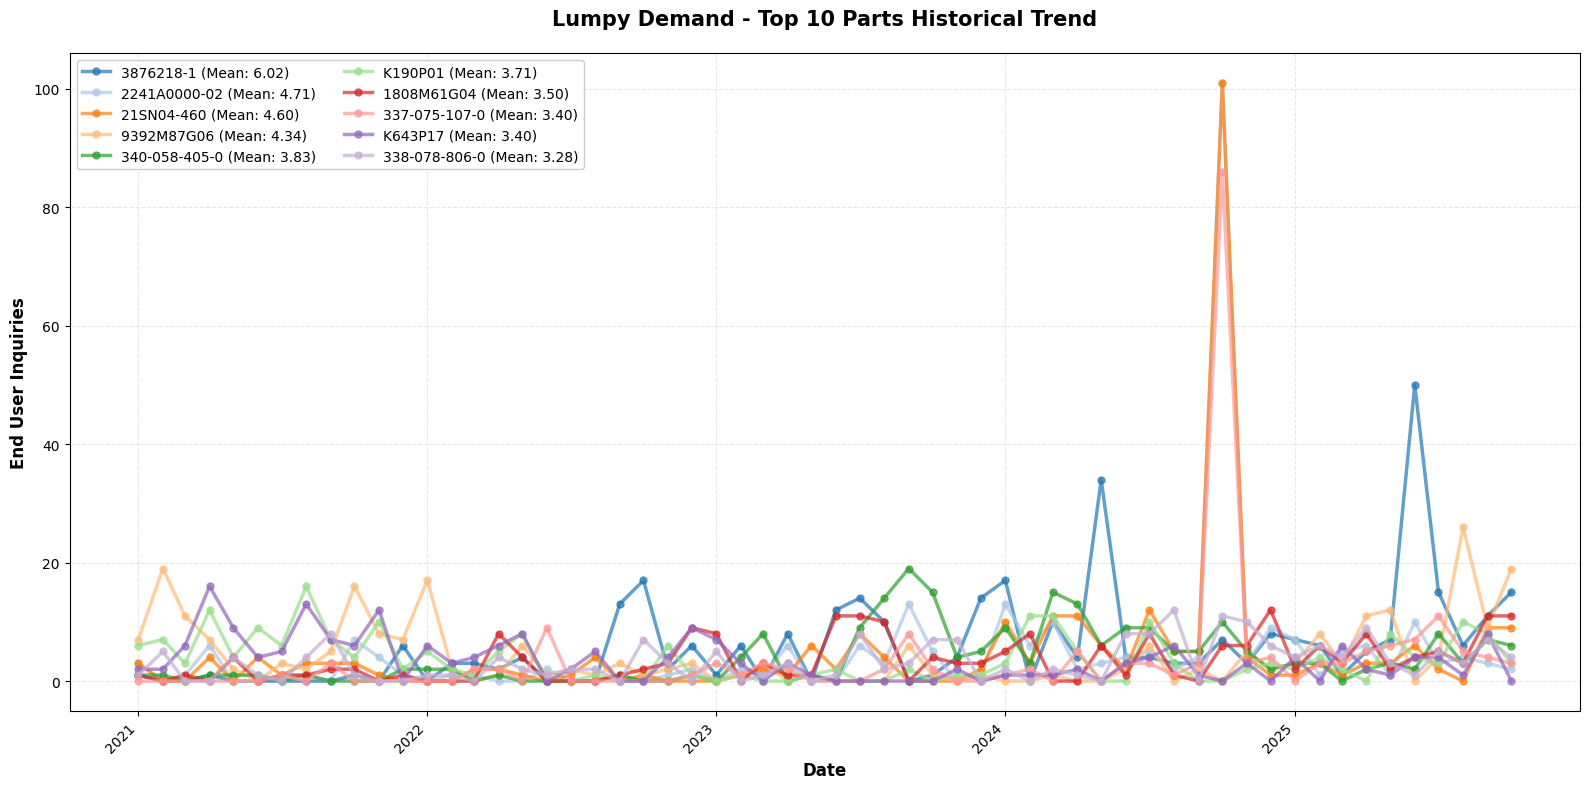

Chart saved as: Trend_Lumpy_Top10.png

All individual trend charts have been generated!


In [28]:

# Create individual large charts for each classification for better visibility
fig_dict = {}

for classification in classification_order:
    fig, ax = plt.subplots(figsize=(16, 8))
    
    # Get top 10 parts for this classification
    top_pns = top_10_by_class[classification]
    
    # Get color palette for top 10 parts
    colors_palette = plt.cm.tab20(range(len(top_pns)))
    
    # Plot trend for each top 10 part
    for color_idx, pn in enumerate(top_pns):
        # Filter data for this part number from df_clean
        pn_data = df_clean[df_clean['PN'] == pn].sort_values('Part Date')
        
        if len(pn_data) > 0:
            # Get metrics for this part
            part_metrics = metrics_df[metrics_df['PN'] == pn].iloc[0]
            ax.plot(pn_data['Part Date'], pn_data['End User Inquiries'], 
                   marker='o', label=f"{pn} (Mean: {part_metrics['Mean_Demand']:.2f})", 
                   alpha=0.7, linewidth=2.5, color=colors_palette[color_idx], markersize=5)
    
    ax.set_title(f'{classification} Demand - Top 10 Parts Historical Trend', 
                fontsize=15, fontweight='bold', pad=20)
    ax.set_xlabel('Date', fontsize=12, fontweight='bold')
    ax.set_ylabel('End User Inquiries', fontsize=12, fontweight='bold')
    ax.legend(loc='upper left', fontsize=10, ncol=2, framealpha=0.95)
    ax.grid(True, alpha=0.3, linestyle='--')
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')
    
    # Add background color based on classification
    color_map = {'Smooth': '#2ecc71', 'Intermittent': '#f39c12', 'Erratic': '#e74c3c', 'Lumpy': '#9b59b6'}
    ax.set_facecolor('white')
    
    plt.tight_layout()
    filename = f'Trend_{classification}_Top10.png'
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    fig_dict[classification] = fig
    plt.show()
    print(f"Chart saved as: {filename}")

print("\nAll individual trend charts have been generated!")


## Trend Analysis Summary

### Key Observations:

**Smooth Demand (Top 10 Parts)**
- Most consistent and predictable demand patterns
- Part `DMC50-17` is the highest demand with 120.22 avg units
- Shows seasonal peaks around mid-2023
- Best candidates for automated ordering systems
- Mean demand ranges from 55.76 to 120.22 units

**Intermittent Demand (Top 10 Parts)**
- Zero or near-zero demand throughout entire period
- Flat line showing no meaningful inquiry activity
- Candidates for discontinuation or special order procurement
- Mean demand is 0.0 across all top 10 parts
- These parts are rarely or never requested

**Erratic Demand (Top 10 Parts)**
- Highly volatile with sharp spikes and valleys
- Part `822-0334-002` shows high volatility (CV²=0.77) with mean of 45.91
- Major spike visible in late 2022/early 2023 for some parts
- Difficult to forecast - requires advanced inventory management
- Mean demand ranges from 25.52 to 45.91 units

**Lumpy Demand (Top 10 Parts)**
- Very sparse and unpredictable demand
- Part `21SN04-460` shows a dramatic spike around mid-2024 (100 units)
- Most parts remain near zero with occasional large orders
- Part `3876218-1` shows highest mean demand at 6.02 units (still low)
- Requires flexible, just-in-time procurement strategies
- Mean demand ranges from 3.28 to 6.02 units